In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
x = np.linspace(0, 5, 11)
y = x ** 2

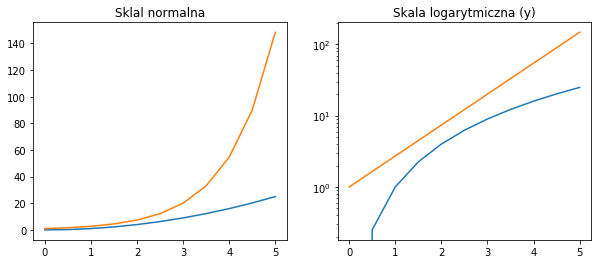

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Sklal normalna")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Skala logarytmiczna (y)");

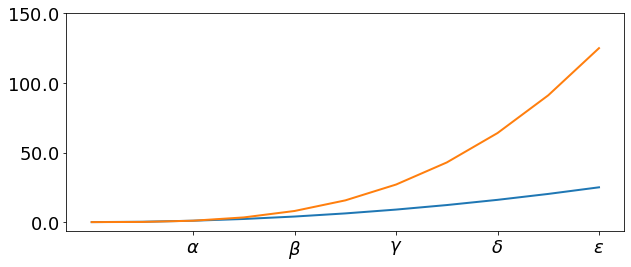

In [10]:
# ustwnianie własnych skal
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # LaTeX formatowanie

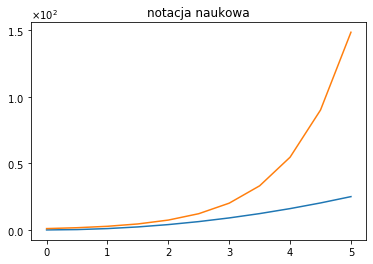

In [12]:
# skala z notacją naukową
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("notacja naukowa")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

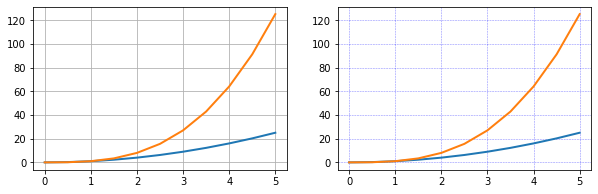

In [13]:
# dodawanie siatki
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# podstawowa siatka
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# ustwanianie siatki
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

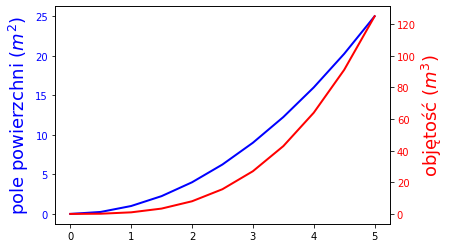

In [16]:
# podwójne osie:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"pole powierzchni $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"objętość $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

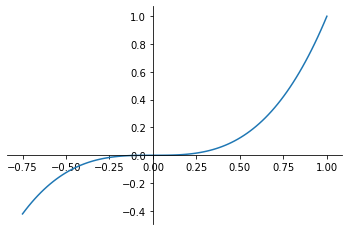

In [18]:
# ustawienie, gdzie x oraz są ustawione na 0:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # ustawienie pozycji x na 0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # ustawienie pozycji y na 0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

In [19]:
# inne style plotów:
n = np.array([0,1,2,3,4,5])

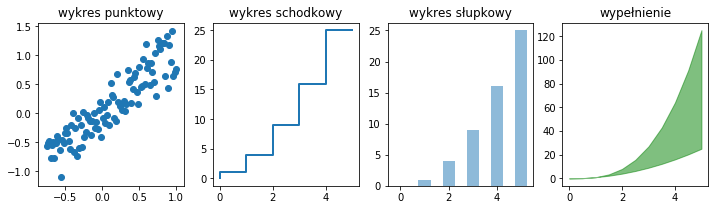

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("wykres punktowy")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("wykres schodkowy")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("wykres słupkowy")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("wypełnienie");

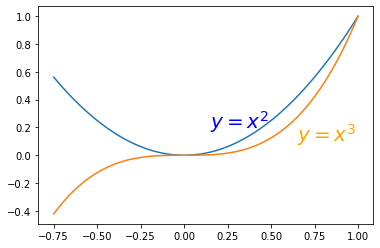

In [22]:
# wypisanie tekstu w stylu LaTex:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="orange");

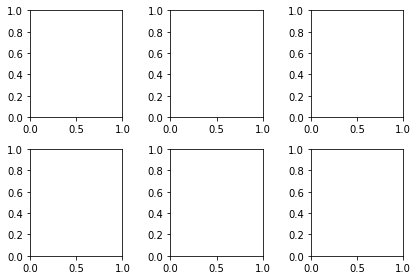

In [23]:
# dostowowyanie subplotów:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

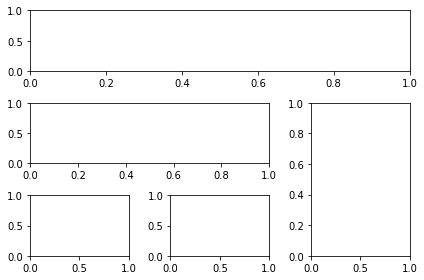

In [24]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

In [32]:
# figury 3D:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib

alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

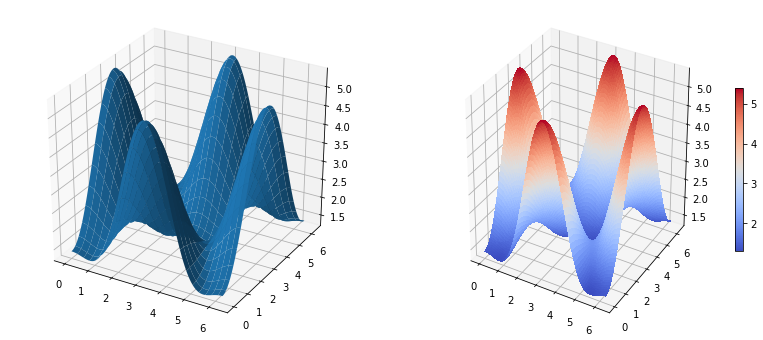

In [34]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

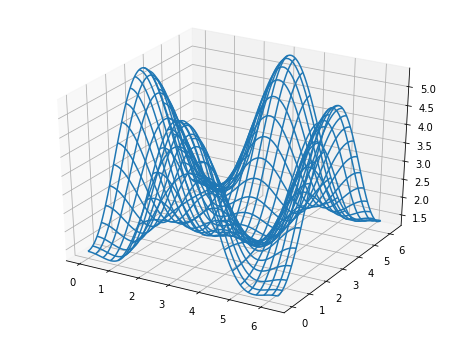

In [35]:
# 3D bez wypełnień:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)